<a href="https://colab.research.google.com/github/ShaliniBairy8/Shalini/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


In [ ]:
import pandas as pd
import numpy as np
d = pd.read_excel(r"/content/Data analyst Data.xlsx")
d.head()


,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [ ]:
column_names = d.columns.tolist()
column_names


['First Name',
 'Email ID',
 'Quantity',
 'Events',
 'Attendee Status',
 'College Name',
 'How did you come to know about this event?',
 'Specify in "Others" (how did you come to know about this event)',
 'Designation',
 'Year of Graduation',
 'City',
 'CGPA',
 'Experience with python (Months)',
 'Family Income',
 'Expected salary (Lac)',
 'Leadership- skills']

# 1 . How many  Unique Students are present in the dataset?

In [ ]:
unique_students = d['First Name'].unique()
for student_name in unique_students:
    print(student_name)


ANIKET
Dhanshree
Dhiraj
Pooja
Aayush
Mrunali
Durga
Ruchit
Mayuresh
ROHIT
Nutan
Yogesh
Pranali
Gaurang
Saba
Apurva 
Tanmay
SUMIT
Shubham 
Shreyas
Shivani
Swapnil
Manasi 
Hemant 
Gaurav
Harshal
Jitesh
Ashish
Pooja 
Shubham
Prachi
Priya
Ashwini 
Chetan
Aakanksha 
Aishwarya
punam
Kanika 
Laxmikant
Ritesh
Harsh
Sanika 
Shruti
Sonali 
Sushant 
Omkar
Krutika 
Sachin
Varun
Anand
Karuna
Vishal
Shweta
Madhuri
Vaishnavi
Rutuja
Somnath 
Rahul 
Kalpesh
Sunny
Sarvesh
Sanjay
amit
Akash
Shraddha 
Supriya
Pratiksha
Nisha
Rehan
Vinit 
Pratiksha 
Ninad
Satish 
Vignesh
Dinesh
Ayushi
Yash
ritesh
Leah
Simran
Puja
Krutika
Kapil
Pallavi 
Himani 
Sachi
Yogita
Bhagyashri
shashank
Sonali
Satish
Kajal
Aditya
Pratik
Sonal
Ashwini
Sagar
Himanshu
Anushka
Aaron
Darsh
Rajkumar
Rushikesh 
Mona 
Chetan 
Apurva
Aatif
Vaibhav
Swapnali
Manish
SANKET
Abhishek 
Rushikesh
Priyanka 
PRAMOD
Samiksha
Rucha
Darshan 
Ankita
Hemant
Ritik 
Snehal
Vedant
Philip
vaibhav
Riya
Priyanka
Payal 
akanksha
Ajinkya
Sapana
AKANKSHA
MAHESH
kaja

# 2. What is the average GPA of the students ?

In [ ]:
r = d['CGPA'].mean()
print("Mean of CGPA: ",r)


Mean of CGPA:  8.038475684511647


# 3. What is the distribution of students across different graduation years ?

In [ ]:
graduation = d['Year of Graduation'].unique()
print(graduation)


[2024 2023 2025 2026]


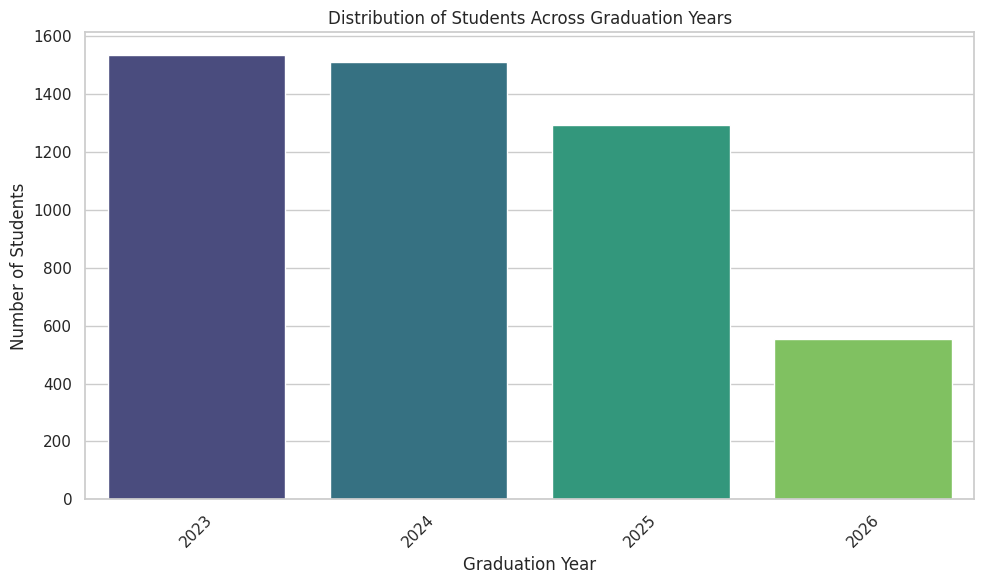

In [ ]:
graduation_year_counts = d['Year of Graduation'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=graduation_year_counts.index, y=graduation_year_counts.values, palette="viridis")
plt.xlabel('Graduation Year')
plt.ylabel('Number of Students')
plt.title('Distribution of Students Across Graduation Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. What is the distribution of student’s experience with Python Programming ?

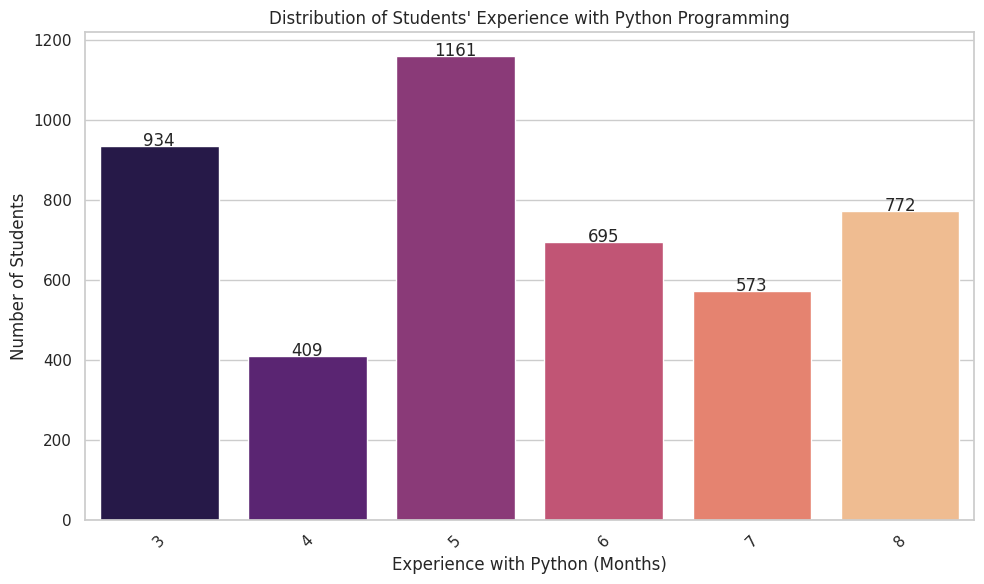

In [ ]:
students_df = d[d['Designation'] == 'Students']
experience_counts = students_df['Experience with python (Months)'].value_counts()

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=experience_counts.index, y=experience_counts.values, palette="magma")
plt.xlabel('Experience with Python (Months)')
plt.ylabel('Number of Students')
plt.title('Distribution of Students\' Experience with Python Programming')
plt.xticks(rotation=45)
plt.tight_layout()

def format_func(value, tick_number):
    return f'{int(value)}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha="center")

plt.show()


# 5. What is the average family income of the student ?

The average family income of students is: 3.79


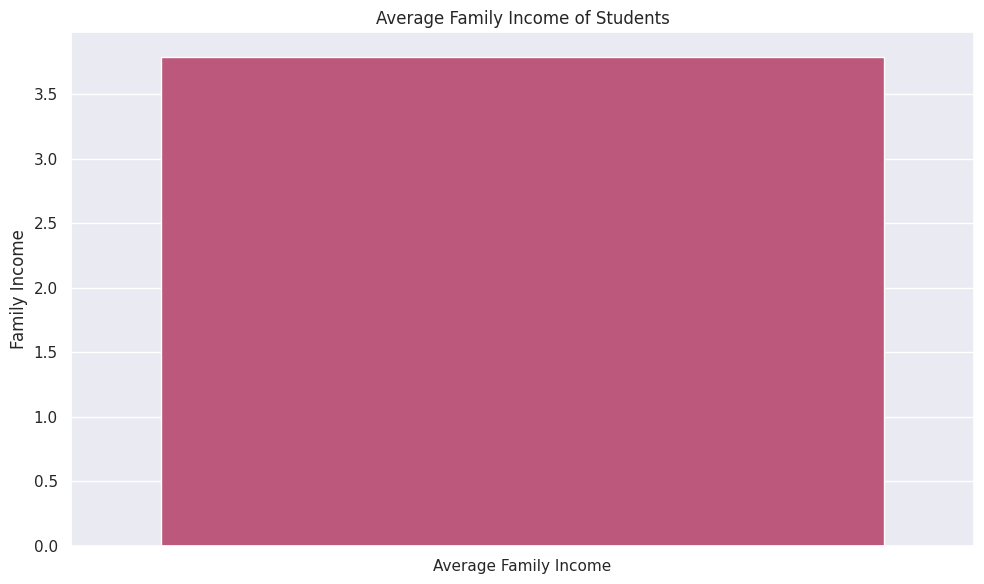

In [ ]:
# Preprocess the Family Income column
def preprocess_income_range(income_range):
    numeric_part = ''.join(filter(str.isdigit, income_range))
    return int(numeric_part)

d['Family Income'] = d['Family Income'].apply(preprocess_income_range)

# Calculate the average family income
average_family_income = d[d['Designation'] == 'Students']['Family Income'].mean()

print(f"The average family income of students is: {average_family_income:.2f}")

# Create a futuristic-style bar plot
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x=["Average Family Income"], y=[average_family_income], palette="plasma")
plt.ylabel('Family Income')
plt.title('Average Family Income of Students')
plt.tight_layout()

# Show the futuristic-style plot
plt.show()


# 6. How does the GPA vary among different Colleges ?

In [ ]:
collegeName = d["College Name"].unique()
collegeName


array(['D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE',
       'AP SHAH INSTITUTE OF TECHNOLOGY ',
       'Don Bosco College of Engineering Fatorda Goa',
       'Pillai College of Engineering New Panvel', "St Xavier's College ",
       'Vidyalankar Institute of Technology, Mumbai',
       'S.I.E.S. Graduate School Of Technology, Nerul, Navi Mumbai',
       'G H Raisoni institut of engineering and technology pune',
       'GOVERNMENT POLYTECHNIC GANDHINAGAR',
       'B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan',
       'Vishwakarma Institute of Technology, Pune',
       "KLE Society's College of BCA, RLS Institute, Belagavi",
       'Priyadarshini college of engineering, Nagpur ',
       'St.Francis Institute of Technology',
       'New horizon institute of Technology and Management ',
       'Late G. N. Sapkal College Of Engineering',
       'MIT Academy Of Engineering ,Alandi',
       'A. C. Patil College of Engineering', 'Wilson college ',
       'LD 

<ipython-input-11-d17fcf3c11bb>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


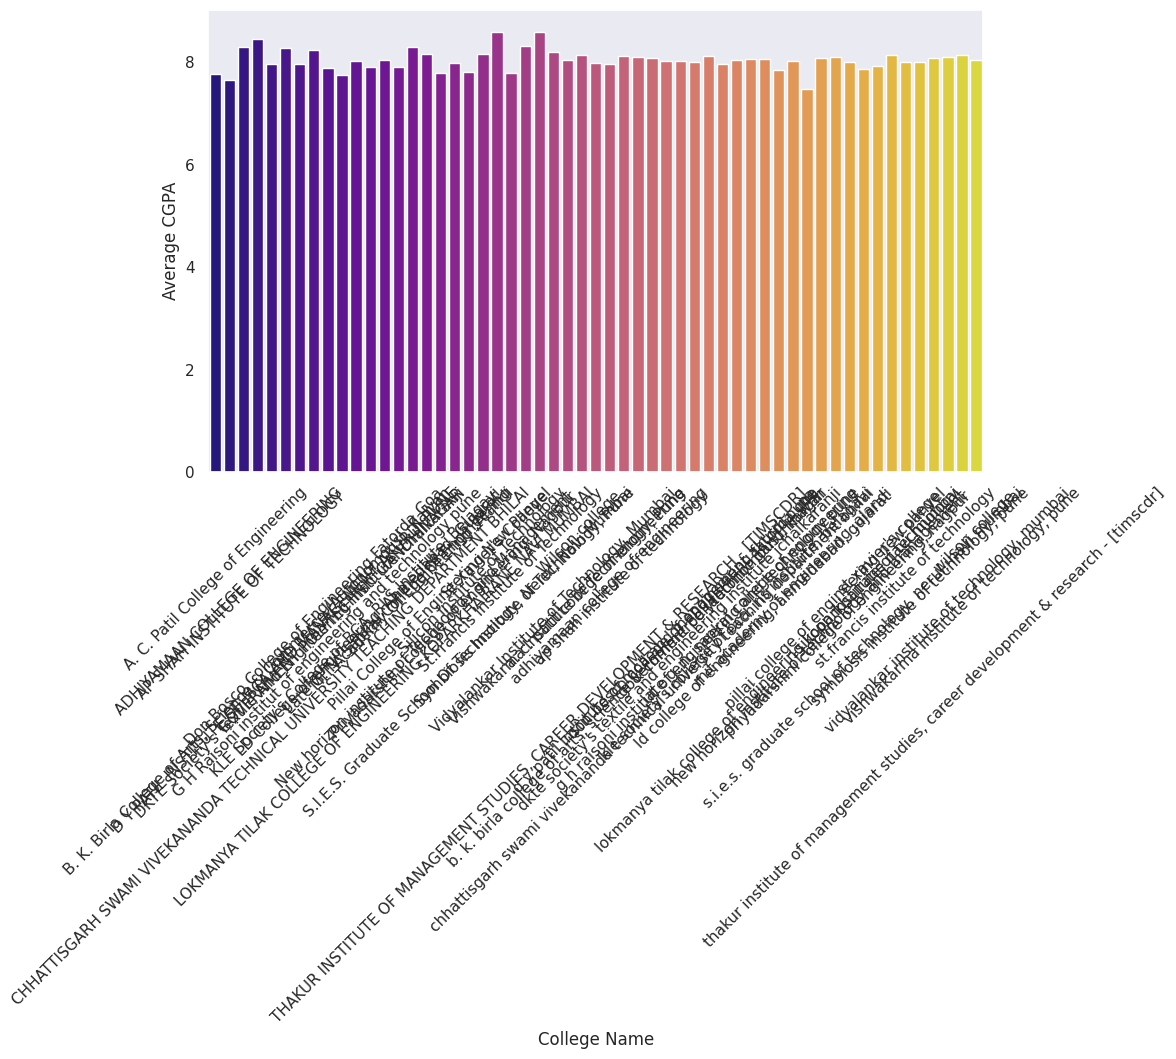

In [ ]:
top_colleges = d.groupby('College Name')['CGPA'].mean()
plt.figure(figsize=(10, 6))
sns.set_style("dark")
sns.barplot(x=top_colleges.index, y=top_colleges.values, palette="plasma")
plt.xlabel('College Name')
plt.ylabel('Average CGPA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-12-9000130b7d14>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


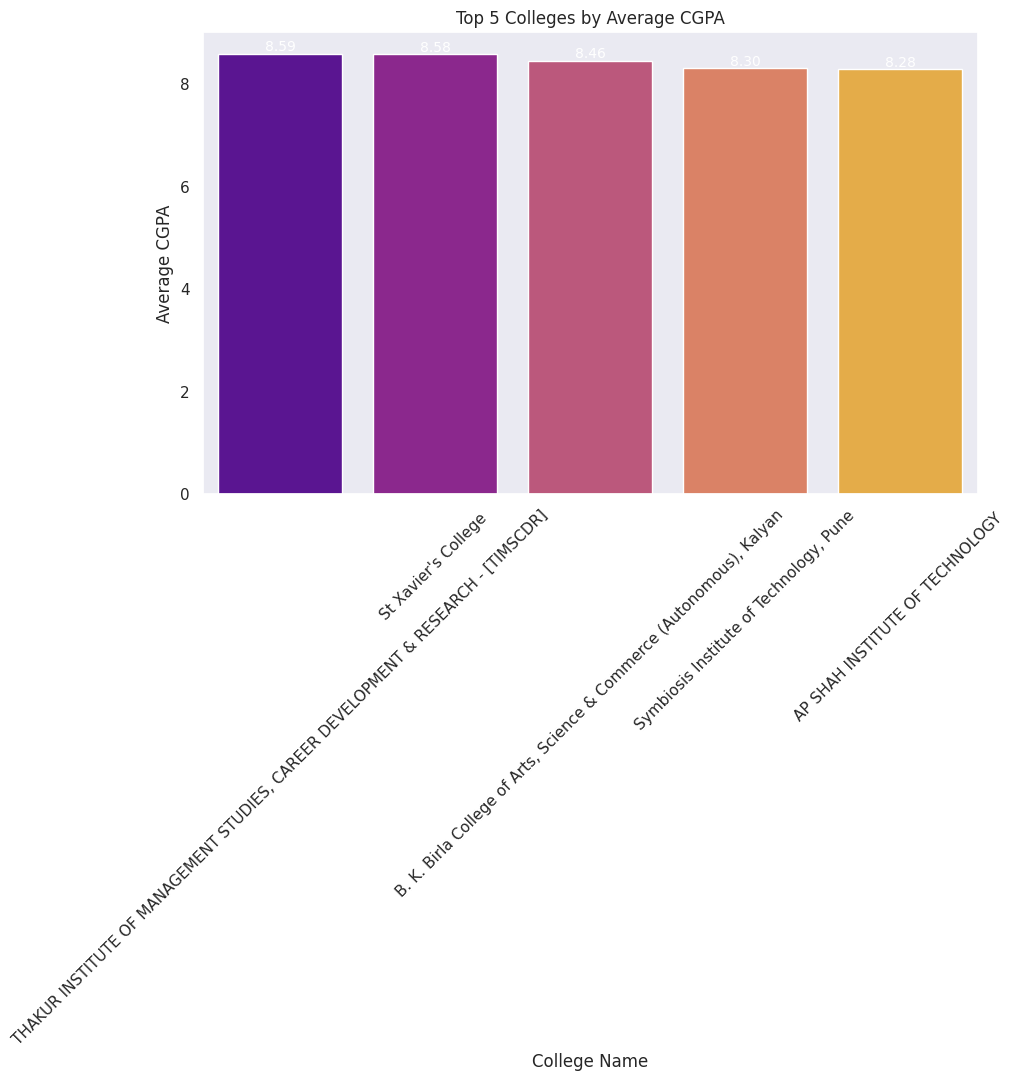

In [ ]:
top_colleges = d.groupby('College Name')['CGPA'].mean().nlargest(5)
plt.figure(figsize=(10, 6))
sns.set_style("dark")
sns_barplot = sns.barplot(x=top_colleges.index, y=top_colleges.values, palette="plasma")
plt.xlabel('College Name')
plt.ylabel('Average CGPA')
plt.title('Top 5 Colleges by Average CGPA')
plt.xticks(rotation=45)
for index, value in enumerate(top_colleges.values):
    sns_barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='white')

plt.tight_layout()
plt.show()


# 7. Are there any outliers in the quantity attribute?
No, there are no outliers in the quantity attribute.


Potential Outliers:
Empty DataFrame
Columns: [First Name, Email ID, Quantity, Events, Attendee Status, College Name, How did you come to know about this event?, Specify in "Others" (how did you come to know about this event), Designation, Year of Graduation, City, CGPA, Experience with python (Months), Family Income, Expected salary (Lac), Leadership- skills]
Index: []


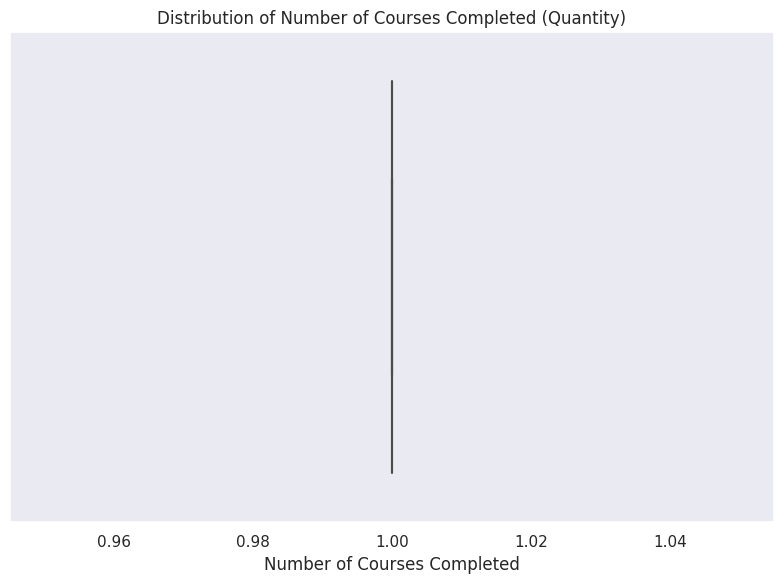

In [ ]:
Q1 = d['Quantity'].quantile(0.25)
Q3 = d['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = d[(d['Quantity'] < lower_bound) | (d['Quantity'] > upper_bound)]
print("Potential Outliers:")
print(outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(x=d['Quantity'])
plt.xlabel('Number of Courses Completed')
plt.title('Distribution of Number of Courses Completed (Quantity)')
plt.tight_layout()
plt.show()


# 8. What is the average GPA for students from each city ?

In [ ]:
average = d[d['Designation'] == 'Students'].groupby('City')['CGPA'].mean().reset_index()

print("Average CGPA for Students from Each City:")
print(average)


Average CGPA for Students from Each City:
          City      CGPA
0     Agartala  7.687500
1         Agra  8.000000
2    Ahemdabad  8.212245
3        Ajmer  8.271429
4        Akola  8.013514
..         ...       ...
172    Vidisha  7.735897
173  Vijaywada  7.995000
174     Wardha  8.328571
175     konark  7.984615
176      kullu  7.933333

[177 rows x 2 columns]


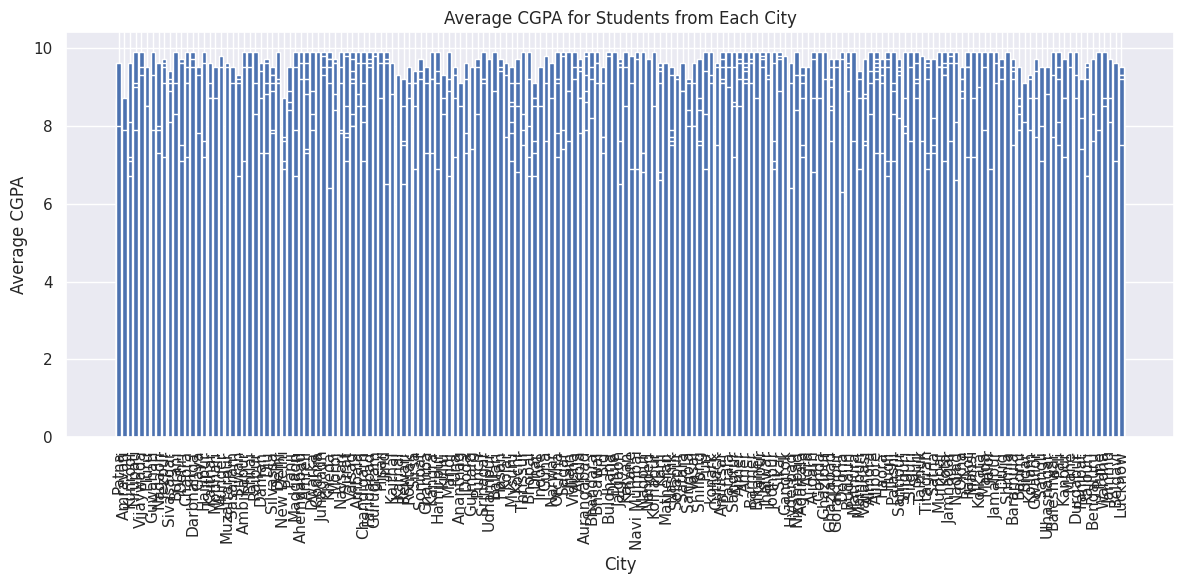

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(d['City'], d['CGPA'],  color='b')
plt.xlabel('City')
plt.ylabel('Average CGPA')
plt.title('Average CGPA for Students from Each City')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()


# 9. Can we identify any Relationship between Family Income and GPA.

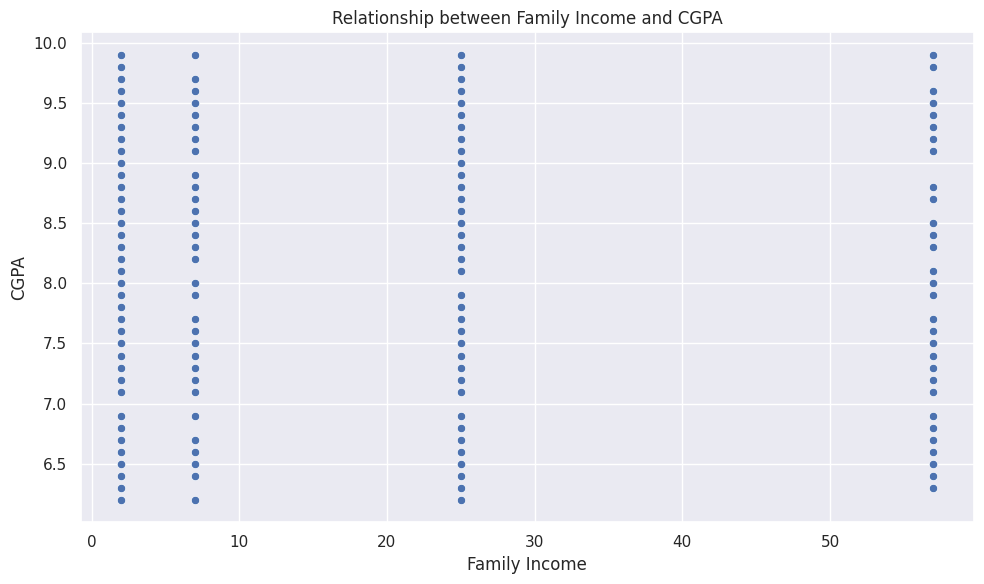

In [ ]:
students_df = d[d['Designation'] == 'Students']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=students_df, x='Family Income', y='CGPA')
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.title('Relationship between Family Income and CGPA')
plt.grid(True)
plt.tight_layout()
plt.show()


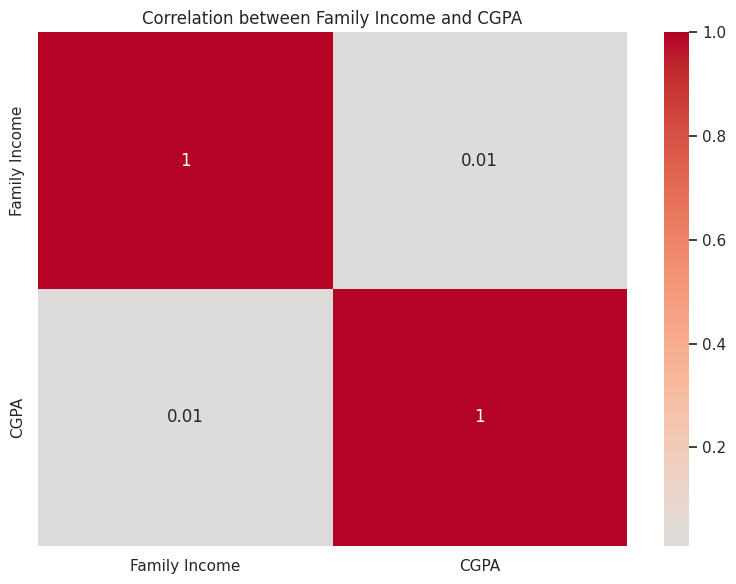

Correlation between Family Income and CGPA: 0.01


In [ ]:
correlation_matrix = students_df[['Family Income', 'CGPA']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Family Income and CGPA')
plt.tight_layout()
plt.show()

correlation = students_df['Family Income'].corr(students_df['CGPA'])
print(f"Correlation between Family Income and CGPA: {correlation:.2f}")


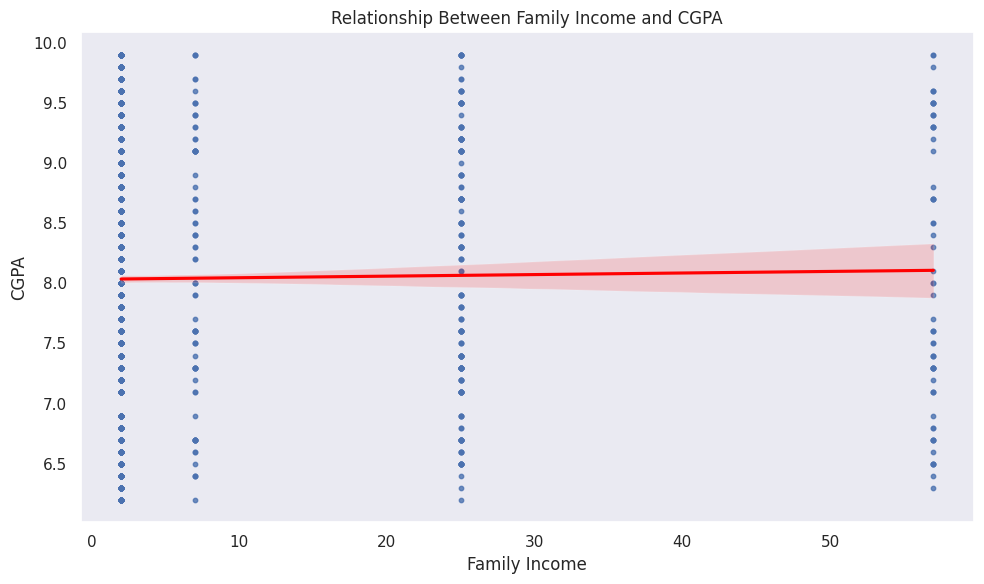

Correlation between Family Income and CGPA: 0.01


In [ ]:
correlation_matrix = students_df[['Family Income', 'CGPA']].corr()
plt.figure(figsize=(10, 6))
sns.regplot(x='Family Income', y='CGPA', data=students_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relationship Between Family Income and CGPA')
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.tight_layout()
plt.show()
correlation = students_df['Family Income'].corr(students_df['CGPA'])
print(f"Correlation between Family Income and CGPA: {correlation:.2f}")


In [ ]:
column_names = d.columns.tolist()
column_names

['First Name',
 'Email ID',
 'Quantity',
 'Events',
 'Attendee Status',
 'College Name',
 'How did you come to know about this event?',
 'Specify in "Others" (how did you come to know about this event)',
 'Designation',
 'Year of Graduation',
 'City',
 'CGPA',
 'Experience with python (Months)',
 'Family Income',
 'Expected salary (Lac)',
 'Leadership- skills']

# MODERATE QUESTIONS

# 11. How does the expected salary vary based on factors like 'GPA' , 'Family Income' and 'Expected Salary'

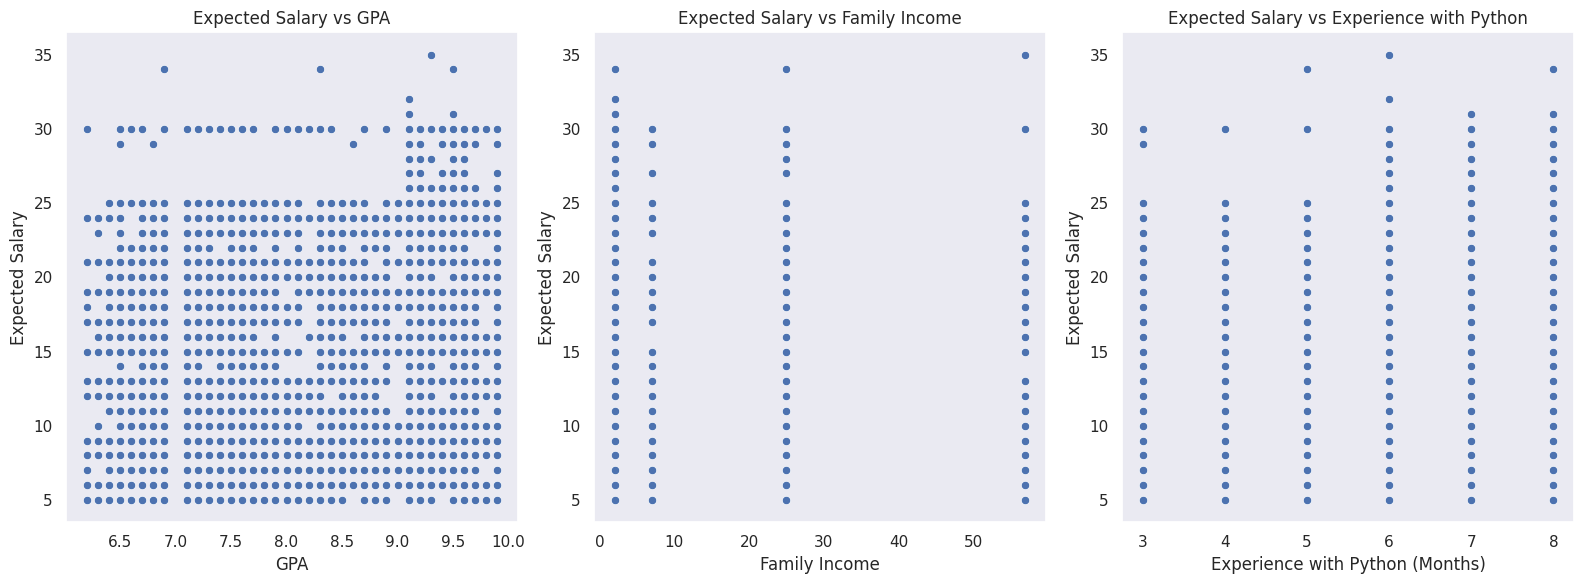

In [ ]:
# Create scatter plots or regression plots to visualize the relationships
plt.figure(figsize=(16, 6))
# Scatter plot: Expected Salary vs GPA
plt.subplot(1, 3, 1)
sns.scatterplot(data= d, x='CGPA', y='Expected salary (Lac)')
plt.title('Expected Salary vs GPA')
plt.xlabel('GPA')
plt.ylabel('Expected Salary')
# Scatter plot: Expected Salary vs Family Income
plt.subplot(1, 3, 2)
sns.scatterplot(data=d, x='Family Income', y='Expected salary (Lac)')
plt.title('Expected Salary vs Family Income')
plt.xlabel('Family Income')
plt.ylabel('Expected Salary')
# Scatter plot: Expected Salary vs Experience with Python
plt.subplot(1, 3, 3)
sns.scatterplot(data=d, x='Experience with python (Months)',
y='Expected salary (Lac)')
plt.title('Expected Salary vs Experience with Python')
plt.xlabel('Experience with Python (Months)')
plt.ylabel('Expected Salary')
plt.tight_layout()
plt.show()


# 12. Which event tend to attract more students from specific fields of study?

<ipython-input-25-7be5a909e992>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


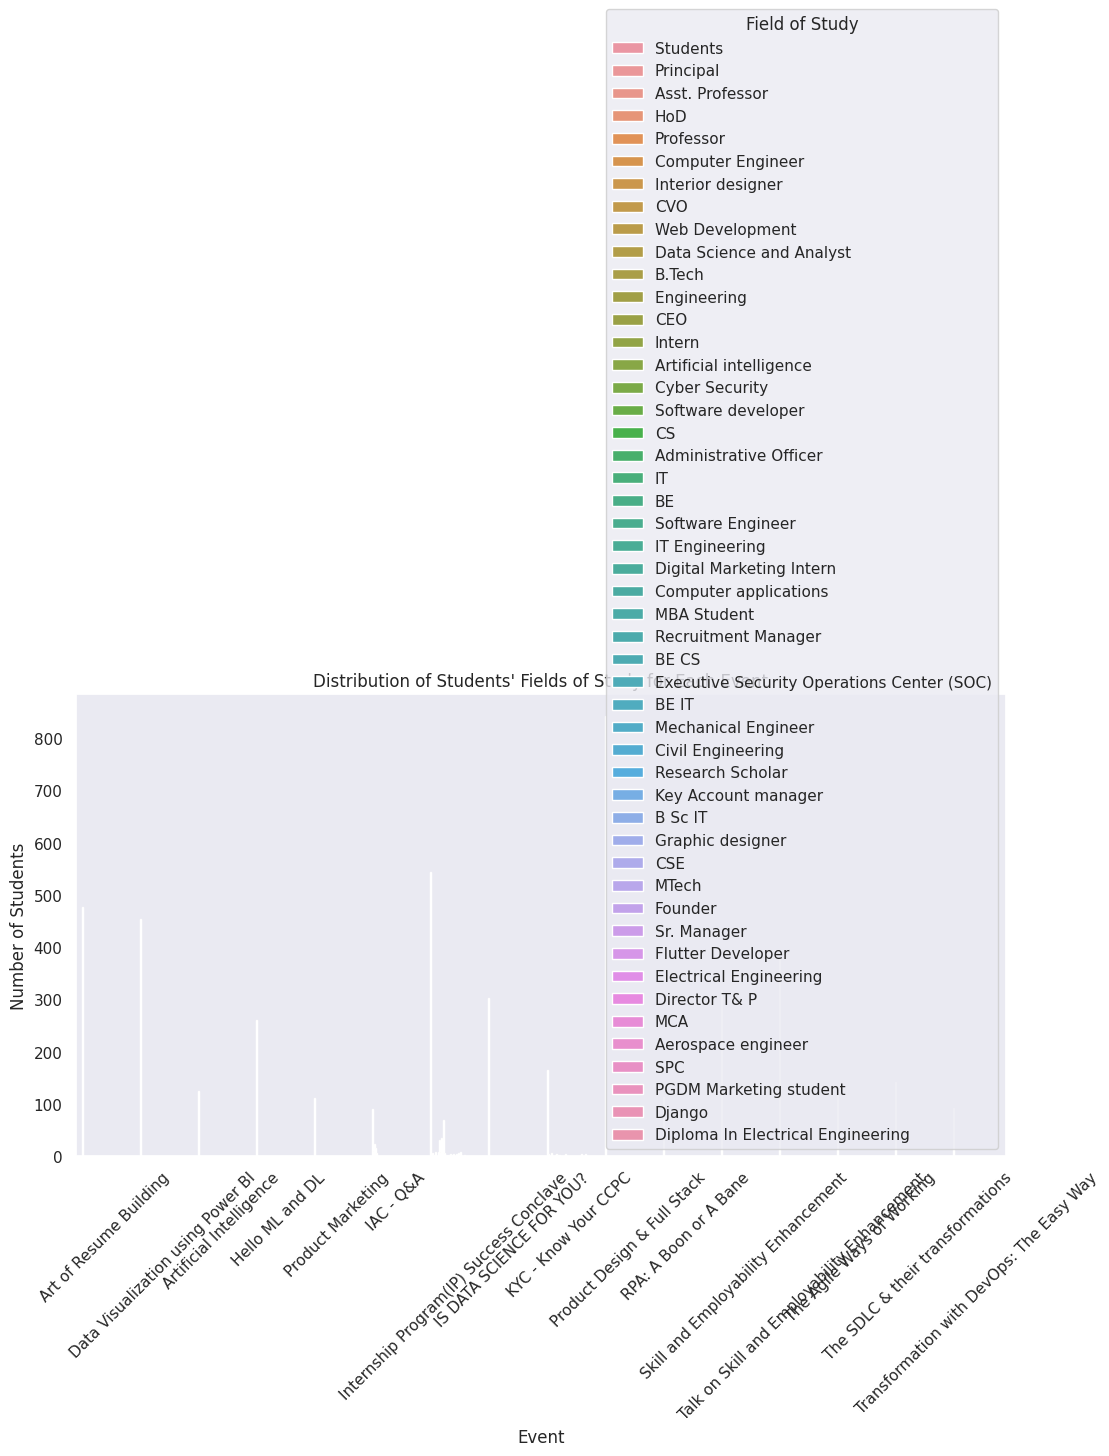

In [ ]:
# Create a count plot to visualize the distribution of attendees from different fields of study for each event
plt.figure(figsize=(12, 6))
sns.countplot(data=d, x='Events', hue='Designation') # Replace 'Designation' with the correct column name
plt.title('Distribution of Students\' Fields of Study for Each Event')
plt.xlabel('Event')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Field of Study')
plt.tight_layout()
plt.show()


# 13. Do students in leadership positions tend to have higher GPAs?

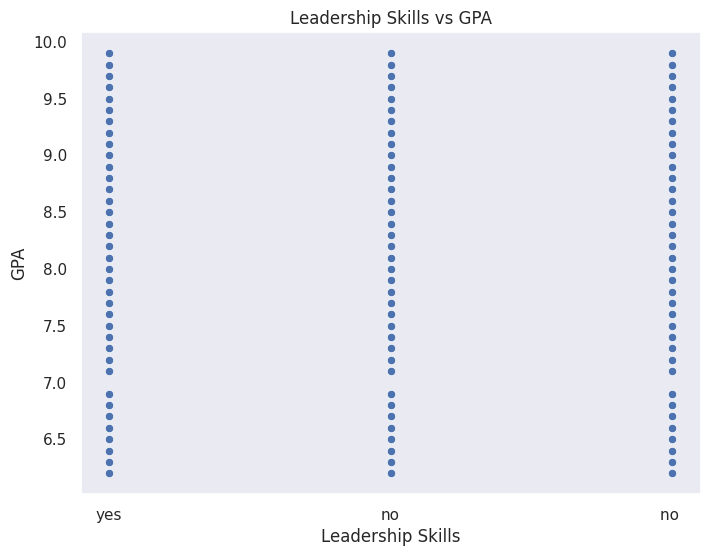

In [ ]:
#Do students in leadership positions tend to have higher GPAs?
plt.figure(figsize=(8, 6))
sns.scatterplot(data=d, x='Leadership- skills', y='CGPA')
plt.title('Leadership Skills vs GPA')
plt.xlabel('Leadership Skills')
plt.ylabel('GPA')
plt.show()

# 14.How many students graduating by the end of 2024 tend to have higher GPAs?

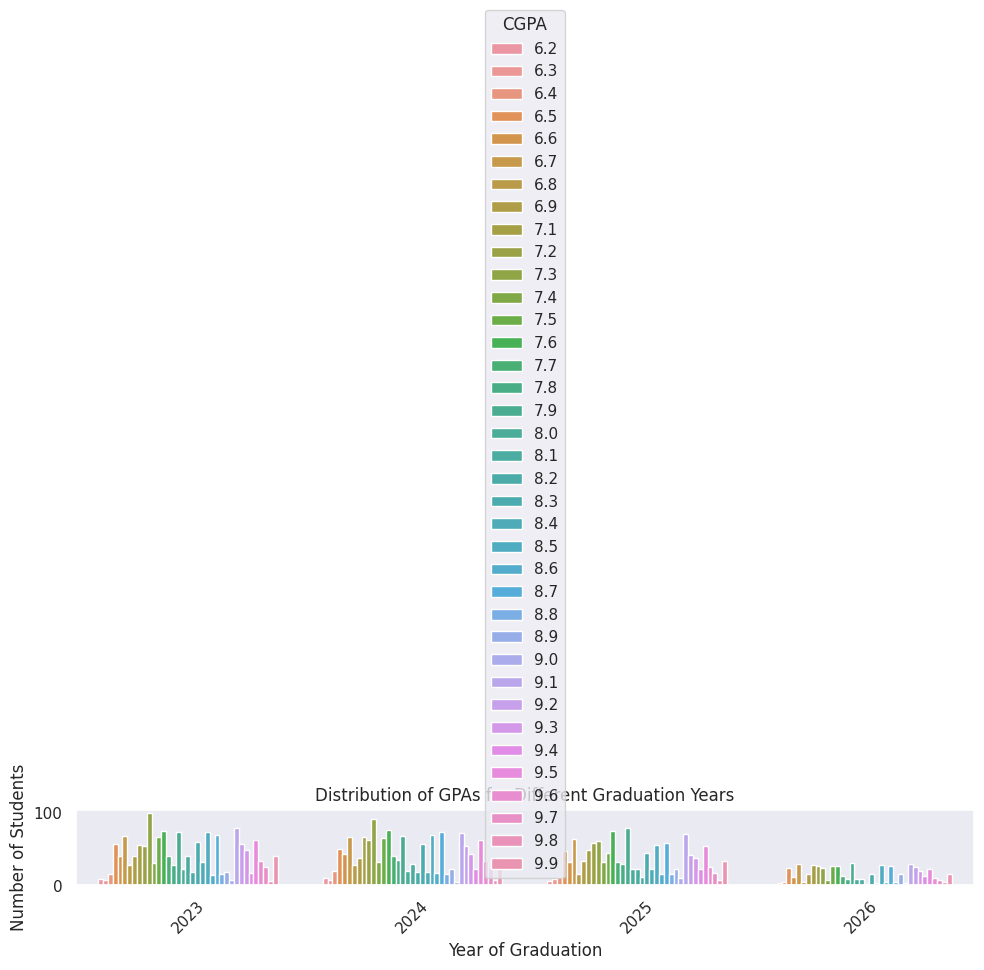

In [ ]:
#. How many students graduating by the end of 2024 tend to have higher GPAs?
plt.figure(figsize=(10, 6))
sns.countplot(data=d, x='Year of Graduation', hue='CGPA')
plt.title('Distribution of GPAs for Different Graduation Years')
plt.xlabel('Year of Graduation')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 15.Which promotion channel brings in more student participations for the event?

<ipython-input-30-30c98320ee4b>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


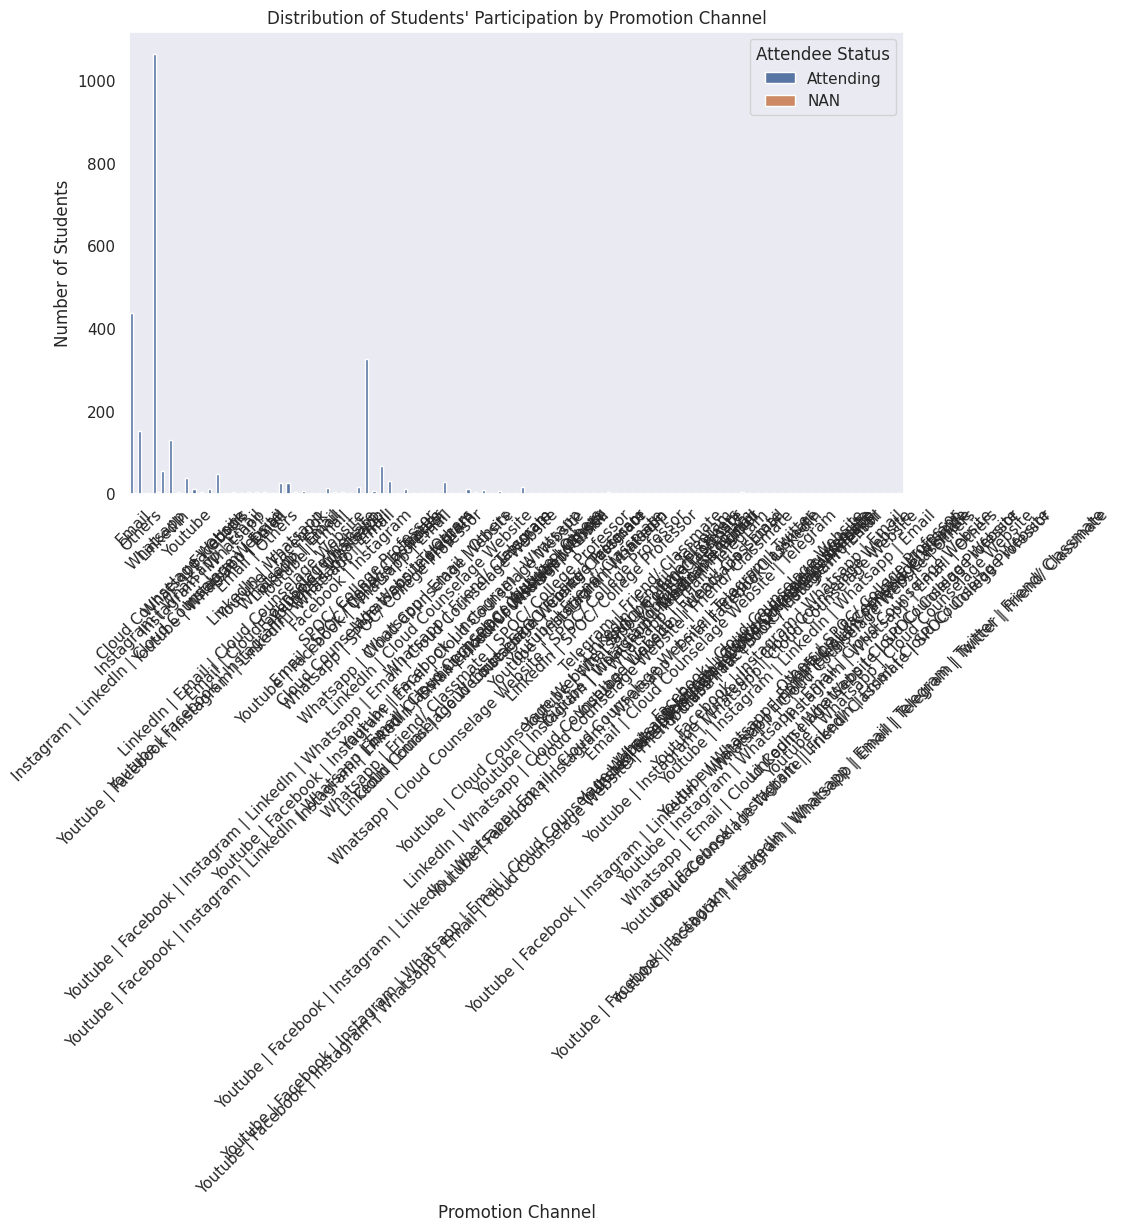

In [ ]:
#Which promotion channel brings in more student participations for the event?
plt.figure(figsize=(10, 6))
sns.countplot(data=d, x='How did you come to know about this event?', hue='Attendee Status')
plt.title('Distribution of Students\' Participation by Promotion Channel')
plt.xlabel('Promotion Channel')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 16.Find the total number of students who attended events related to Data Science?

In [ ]:
#Find the total number of students who attended events related to Data Science?
data_science_events = ['Data Science Event 1', 'Data Science Event 2','Data Science Event 3']
data_science_attendees = d[d['Events'].isin(data_science_events)].shape[0]
print("Total number of students who attended Data Science events:", data_science_attendees)

Total number of students who attended Data Science events: 0


# 17. Do students with high CGPA and more experience tend to have higher salary expectations?

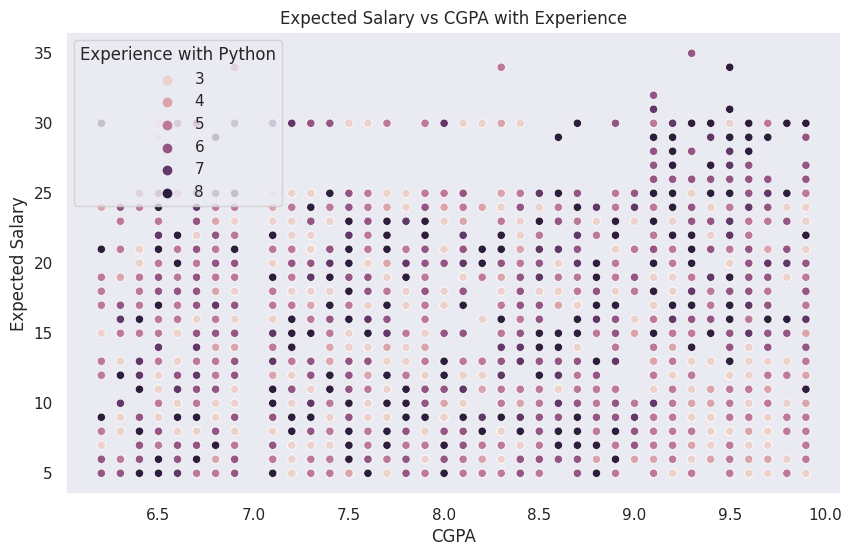

In [ ]:
#Do students with high CGPA and more experience tend to have higher salary expectations?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=d, x='CGPA', y='Expected salary (Lac)', hue='Experience with python (Months)')
plt.title('Expected Salary vs CGPA with Experience')
plt.xlabel('CGPA')
plt.ylabel('Expected Salary')
plt.legend(title='Experience with Python')
plt.show()


# 18. How many students know about the event from their colleges? Which of these Top 5 colleges?

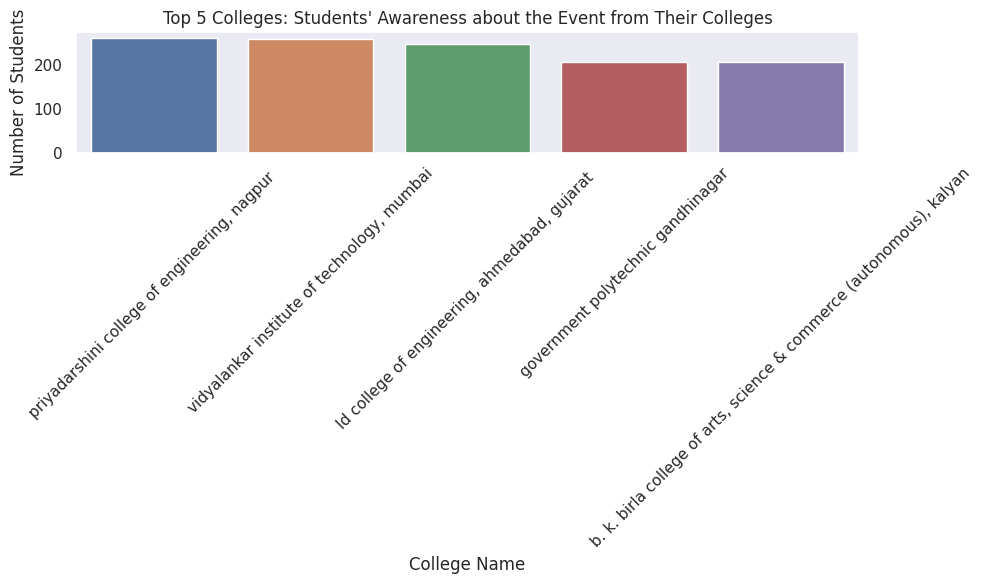

In [ ]:
# How many students know about the event from their colleges? Which of these Top 5 colleges?
top_colleges = d['College  Name'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_colleges.index, y=top_colleges.values)
plt.title('Top 5 Colleges: Students\' Awareness about the Event from Their Colleges')
plt.xlabel('College Name')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()